In [211]:
import os
import itertools
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.colorbrewer.sequential import YlGn_8
from palettable.wesanderson import Mendl_4
from palettable.cartocolors.sequential import PurpOr_6
from palettable.colorbrewer.diverging import PuOr_7

from ideotype.data_process import read_data, agg_sims, fetch_sim_values, parse_mature
from ideotype.analysis import identify_top_phenos, rank_all_phenos, rank_top_phenos
from ideotype.figures import plot_sims_raw, plot_sims_phenostage
from ideotype.init_params import params_sample
from ideotype.utils import fold
from ideotype import DATA_PATH

In [215]:
run_name = 'f2100'

# Read in data etc.
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)

# Queried maizsim outputs
df_sims = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_yield.csv'))
df_phys = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_phys.csv'))
df_carbon = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_carbon.csv'))
df_mass = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_mass.csv'))
df_leaves = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_leaves.csv'))
df_waterdeficit = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit.csv'))
df_waterdeficit_sum = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit_sum.csv'))
df_waterpotential = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterpotential.csv'))
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
df_gseason_climate = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_gseason_climate.csv'))

Text(0, 0.5, 'yield')

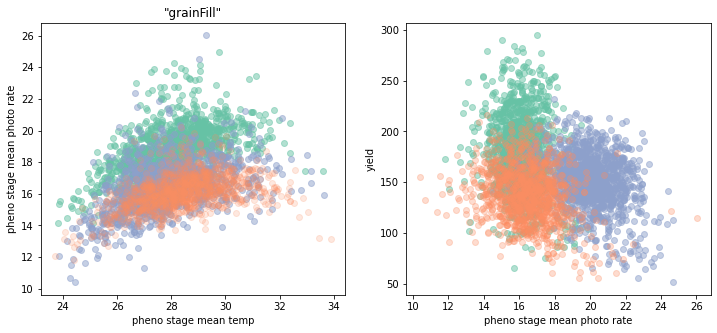

In [225]:
df_wea.site = df_wea.site.astype(int)

cvar = 90
#cvar = 76
pheno_stage = '"grainFill"'

df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#66c2a5', alpha=0.5)
ax1.set_xlabel('pheno stage mean temp')
ax1.set_ylabel('pheno stage mean photo rate')


cvar = 5
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#8da0cb', alpha=0.5)

cvar = 9
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An,
            color='#fc8d62', alpha=0.2)
ax1.set_title(f'{pheno_stage}')


cvar = 4
#cvar = 76
df_all.site = df_all.site.astype(int)
df_phys_sub_merged = df_phys_sub.merge(df_all, on=['cvar','site','year'])
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_phys_sub_merged.An, df_phys_sub_merged.dm_ear, color='#66c2a5', alpha=0.5)

cvar = 5
df_all.site = df_all.site.astype(int)
df_phys_sub_merged = df_phys_sub.merge(df_all, on=['cvar','site','year'])
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
ax2.scatter(df_phys_sub_merged.An, df_phys_sub_merged.dm_ear, color='#8da0cb', alpha=0.5)

cvar = 9
df_all.site = df_all.site.astype(int)
df_phys_sub_merged = df_phys_sub.merge(df_all, on=['cvar','site','year'])
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
ax2.scatter(df_phys_sub_merged.An, df_phys_sub_merged.dm_ear, color='#fc8d62', alpha=0.3)
ax2.set_xlabel('pheno stage mean photo rate')
ax2.set_ylabel('yield')


Text(0, 0.5, 'yield')

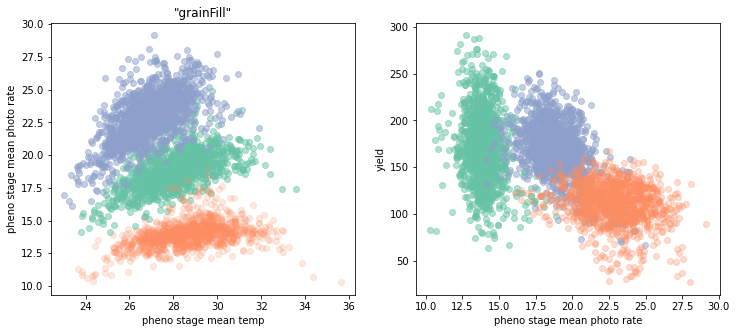

In [229]:
df_wea.site = df_wea.site.astype(int)

cvar = 90
#cvar = 76
pheno_stage = '"grainFill"'

df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#66c2a5', alpha=0.5)
ax1.set_xlabel('pheno stage mean temp')
ax1.set_ylabel('pheno stage mean photo rate')


cvar = 58
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#8da0cb', alpha=0.5)

cvar = 89
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An,
            color='#fc8d62', alpha=0.2)
ax1.set_title(f'{pheno_stage}')


cvar = 90
df_all.site = df_all.site.astype(int)
df_phys_sub_merged = df_phys_sub.merge(df_all, on=['cvar','site','year'])
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_phys_sub_merged.An, df_phys_sub_merged.dm_ear, color='#66c2a5', alpha=0.5)

cvar = 58
df_all.site = df_all.site.astype(int)
df_phys_sub_merged = df_phys_sub.merge(df_all, on=['cvar','site','year'])
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
ax2.scatter(df_phys_sub_merged.An, df_phys_sub_merged.dm_ear, color='#8da0cb', alpha=0.5)

cvar = 89
df_all.site = df_all.site.astype(int)
df_phys_sub_merged = df_phys_sub.merge(df_all, on=['cvar','site','year'])
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
ax2.scatter(df_phys_sub_merged.An, df_phys_sub_merged.dm_ear, color='#fc8d62', alpha=0.3)
ax2.set_xlabel('pheno stage mean photo rate')
ax2.set_ylabel('yield')


Text(0.5, 1.0, '"grainFill"')

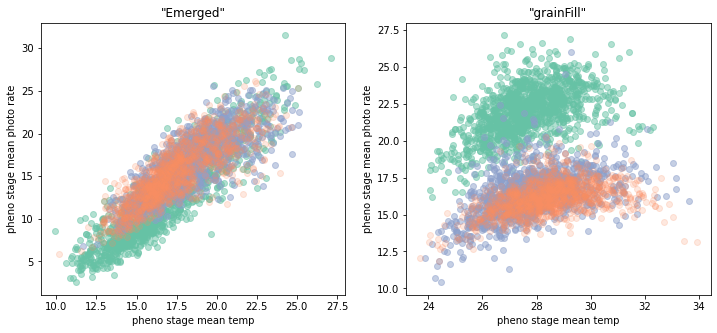

In [226]:
# but when you actually plot it against the climate of that specific pheno stage
# you see a clear positive relationship
# seems like photosynthesis never reaches its temperature optimum,
# other than towards the very end of the season (grain-fill)
# and even then it barely seems to plateau.

cvar = 4
pheno_stage = '"Emerged"'


df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#66c2a5', alpha=0.5)
ax1.set_xlabel('pheno stage mean temp')
ax1.set_ylabel('pheno stage mean photo rate')


cvar = 5
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#8da0cb', alpha=0.5)

cvar = 9
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax1.scatter(df_climate_sub.temp_air, df_phys_sub.An,
            color='#fc8d62', alpha=0.2)

ax1.set_title(f'{pheno_stage}')


pheno_stage = '"grainFill"'
ax2= fig.add_subplot(1,2,2)

cvar = 76
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax2.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#66c2a5', alpha=0.5)

cvar = 5
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax2.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#8da0cb', alpha=0.5)

cvar = 9
df_climate_sub = df_gseason_climate[df_gseason_climate.pheno == f'{pheno_stage}'].query(f'cvar=={cvar}')
df_phys_sub = df_phys[df_phys.pheno==f'{pheno_stage}'].query(f'cvar=={cvar}')
df_merged_gseason = df_phys_sub.merge(df_wea, on=['site','year'])
ax2.scatter(df_climate_sub.temp_air, df_phys_sub.An, 
            color='#fc8d62', alpha=0.2)



ax2.set_xlabel('gseason mean temp')
ax2.set_xlabel('pheno stage mean temp')
ax2.set_ylabel('pheno stage mean photo rate')
ax2.set_title(f'{pheno_stage}')




Text(0, 0.5, 'yield')

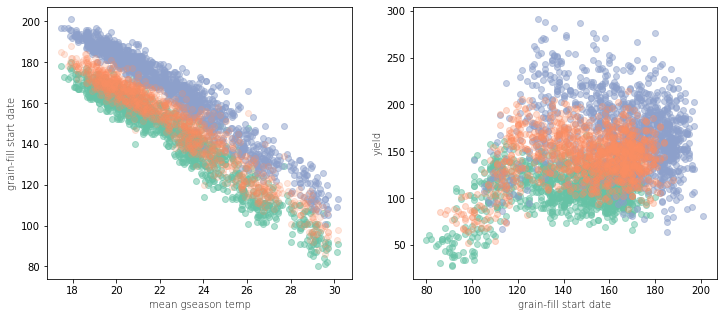

In [220]:
# fetch emergent properties
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
df_pheno_gf = df_phenology[df_phenology.pheno == '"grainFill"']

# grain-filling length
gf_lengths = []
for pheno in phenos_ranked:
    df_sub = df_pheno_gf.query(f'cvar=={pheno}')
    gf_length = df_sub.mean()['pheno_days']
    gf_lengths.append(gf_length)
    
# grain-filling length
gf_startdates = []
for pheno in phenos_ranked:
    df_sub = df_pheno_gf.query(f'cvar=={pheno}')
    gf_startdate = df_sub.mean()['jday']
    gf_startdates.append(gf_startdate)
    
# leaf areas
LA = fetch_sim_values(df_leaves, '"grainFill"', 'LA', phenos_ranked)
df_all.site = df_all.site.astype(int)
df_merged = df_pheno_gf.merge(df_all, on=['cvar','site','year'])

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
pheno = 58
ax1.scatter(df_merged.query(f'cvar=={pheno}').temp, 
            df_merged.query(f'cvar=={pheno}').jday_x, 
            color='#66c2a5', alpha=0.5)
pheno = 89
ax1.scatter(df_merged.query(f'cvar=={pheno}').temp, 
            df_merged.query(f'cvar=={pheno}').jday_x, 
            color='#8da0cb', alpha=0.5)
pheno = 65
ax1.scatter(df_merged.query(f'cvar=={pheno}').temp, 
            df_merged.query(f'cvar=={pheno}').jday_x, 
            color='#fc8d62', alpha=0.2)

ax1.set_xlabel('mean gseason temp', fontweight='light')
ax1.set_ylabel('grain-fill start date', fontweight='light')


ax2 = fig.add_subplot(1,2,2)
pheno = 58
ax2.scatter(df_merged.query(f'cvar=={pheno}').jday_x, 
            df_merged.query(f'cvar=={pheno}').dm_ear, 
            color='#66c2a5', alpha=0.5)
pheno = 89
ax2.scatter(df_merged.query(f'cvar=={pheno}').jday_x, 
            df_merged.query(f'cvar=={pheno}').dm_ear, 
            color='#8da0cb', alpha=0.5)
pheno = 65
ax2.scatter(df_merged.query(f'cvar=={pheno}').jday_x, 
            df_merged.query(f'cvar=={pheno}').dm_ear, 
            color='#fc8d62', alpha=0.3)

ax2.set_xlabel('grain-fill start date', fontweight='light')
ax2.set_ylabel('yield', fontweight='light')

Text(0, 0.5, 'yield')

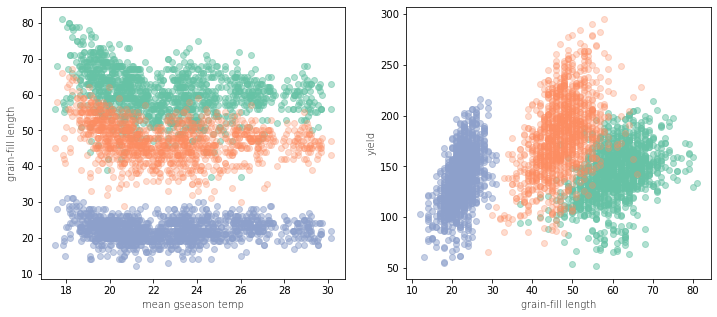

In [222]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
#pheno=76
pheno=65
ax1.scatter(df_merged.query(f'cvar=={pheno}').temp, 
            df_merged.query(f'cvar=={pheno}').pheno_days, 
            color='#66c2a5', alpha=0.5)
pheno=5
ax1.scatter(df_merged.query(f'cvar=={pheno}').temp, 
            df_merged.query(f'cvar=={pheno}').pheno_days, 
            color='#8da0cb', alpha=0.5)
pheno=9
ax1.scatter(df_merged.query(f'cvar=={pheno}').temp, 
            df_merged.query(f'cvar=={pheno}').pheno_days, 
            color='#fc8d62', alpha=0.3)

ax1.set_xlabel('mean gseason temp', fontweight='light')
ax1.set_ylabel('grain-fill length', fontweight='light')


ax2 = fig.add_subplot(1,2,2)
pheno=65
#pheno=76
ax2.scatter(df_merged.query(f'cvar=={pheno}').pheno_days, 
            df_merged.query(f'cvar=={pheno}').dm_ear, 
            color='#66c2a5', alpha=0.5)
pheno=5
ax2.scatter(df_merged.query(f'cvar=={pheno}').pheno_days, 
            df_merged.query(f'cvar=={pheno}').dm_ear, 
            color='#8da0cb', alpha=0.5)
pheno=9
ax2.scatter(df_merged.query(f'cvar=={pheno}').pheno_days, 
            df_merged.query(f'cvar=={pheno}').dm_ear, 
            color='#fc8d62', alpha=0.3)

ax2.set_xlabel('grain-fill length', fontweight='light')
ax2.set_ylabel('yield', fontweight='light')

In [173]:
year = 1982
#pheno = 81
#pheno = 58
pheno = 44
site = 724650

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/present/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']
test_sim.columns = cols

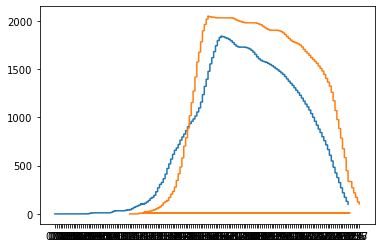

In [230]:
year = 1961
pheno = 9
site = 724320

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/present/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']
test_sim.columns = cols
datetimes = []
for item in np.arange(test_sim.shape[0]):
    datetime_formatted = datetime.strptime(test_sim.date[item], '%m/%d/%Y').strftime('%j')
    datetimes.append(datetime_formatted)

plt.plot(datetimes, test_sim.LA)

year = 1974
pheno = 44
site = 724650

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/present/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']

datetimes = []
for item in np.arange(test_sim.shape[0]):
    datetime_formatted = datetime.strptime(test_sim.date[item], '%m/%d/%Y').strftime('%j')
    datetimes.append(datetime_formatted)
test_sim.columns = cols

plt.plot(datetimes, test_sim.LA)


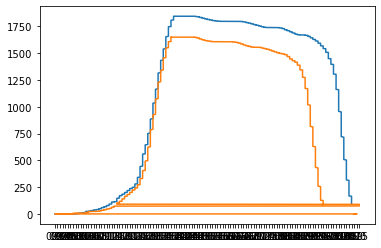

In [205]:
year = 1982
pheno = 44
site = 724650

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/f2100/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']
test_sim.columns = cols
datetimes = []
for item in np.arange(test_sim.shape[0]):
    datetime_formatted = datetime.strptime(test_sim.date[item], '%m/%d/%Y').strftime('%j')
    datetimes.append(datetime_formatted)

plt.plot(datetimes, test_sim.LA)

year = 1974
pheno = 44
site = 724650

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/f2100/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']

datetimes = []
for item in np.arange(test_sim.shape[0]):
    datetime_formatted = datetime.strptime(test_sim.date[item], '%m/%d/%Y').strftime('%j')
    datetimes.append(datetime_formatted)
test_sim.columns = cols

plt.plot(datetimes, test_sim.LA)


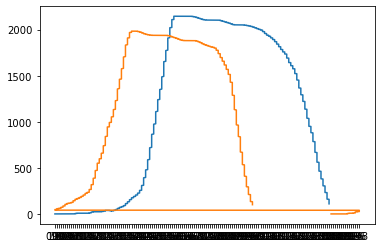

In [210]:
year = 1991
pheno = 44
site = 724650

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/present/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']
test_sim.columns = cols
datetimes = []
for item in np.arange(test_sim.shape[0]):
    datetime_formatted = datetime.strptime(test_sim.date[item], '%m/%d/%Y').strftime('%j')
    datetimes.append(datetime_formatted)

plt.plot(datetimes, test_sim.LA)

test_sim = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/f2100/'
                       f'{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt',
                       sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']

datetimes = []
for item in np.arange(test_sim.shape[0]):
    datetime_formatted = datetime.strptime(test_sim.date[item], '%m/%d/%Y').strftime('%j')
    datetimes.append(datetime_formatted)
test_sim.columns = cols

plt.plot(datetimes, test_sim.LA)


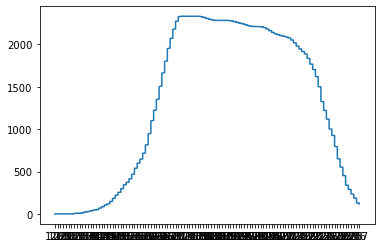

In [193]:
plt.plot(datetimes, test_sim.LA)

In [178]:
wea_siteyear = pd.read_csv(f'/home/disk/eos8/ach315/upscale/weadata/data/control/'
                           f'{site}_{year}.txt', sep='\t')

jday_start = int(datetime.strptime(test_sim.loc[0,'date'], '%m/%d/%Y').strftime('%j'))
jday_end = int(datetime.strptime(test_sim.iloc[-1]['date'], '%m/%d/%Y').strftime('%j'))
#test_wea = wea_siteyear.query(f'{jday_start}<=jday<={jday_end}')
#test_wea = wea_siteyear.query(f'{jday_start}<=jday<={jday_end}')[:-(24-test_sim.iloc[-1]['time'])+1]
test_wea = wea_siteyear.query(f'{jday_start}<=jday<={jday_end}')[:-(24-test_sim.iloc[-1]['time'])+2]

In [179]:
test_sim.shape[0]==test_wea.shape[0]

True

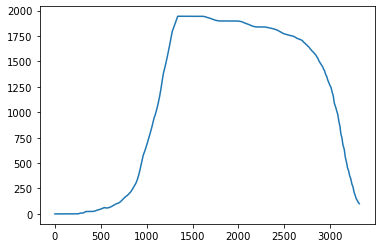

In [180]:
plt.plot(test_sim.LA)

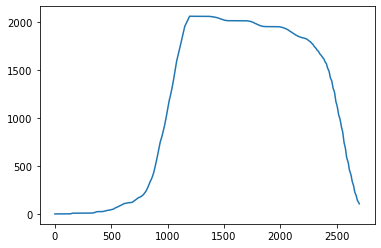

In [172]:
plt.plot(test_sim.LA)

In [168]:
test_sim_day = test_sim.query('Solrad > 500')
test_sim_noon = test_sim.query('time==12')

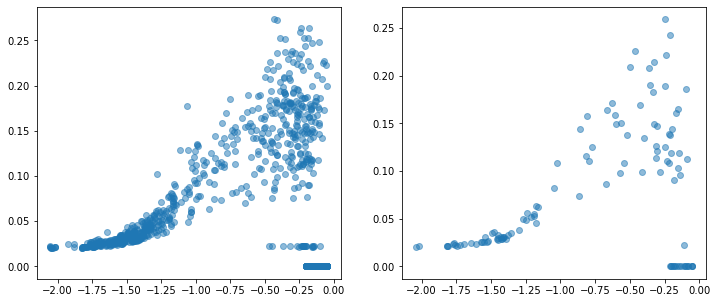

In [169]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(test_sim_day.leaf_WP, test_sim_day.av_gs, alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(test_sim_noon.leaf_WP, test_sim_noon.av_gs, alpha=0.5)

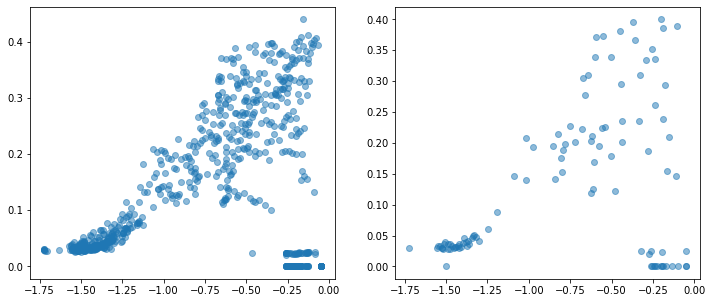

In [83]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(test_sim_day.leaf_WP, test_sim_day.av_gs, alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(test_sim_noon.leaf_WP, test_sim_noon.av_gs, alpha=0.5)

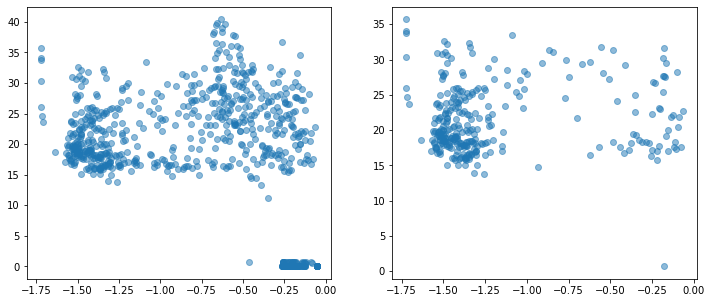

In [84]:
test_sim_day_pheno = test_sim_day[test_sim_day.note==list(set(test_sim_day.note))[4]]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(test_sim_day.leaf_WP, test_sim_day.An_shaded, alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(test_sim_day_pheno.leaf_WP, test_sim_day_pheno.An_shaded, alpha=0.5)

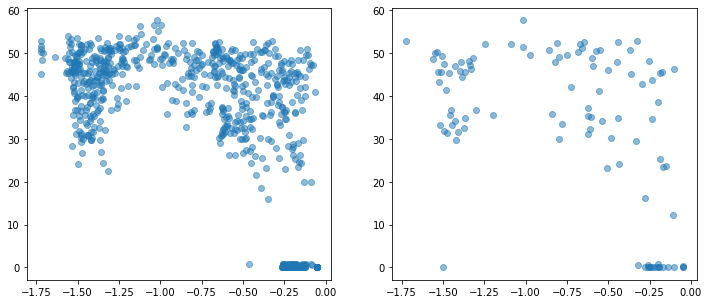

In [85]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(test_sim_day.leaf_WP, test_sim_day.An_sunlit, alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(test_sim_noon.leaf_WP, test_sim_noon.An_sunlit, alpha=0.5)

In [ ]:
import collections

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from palettable.colorbrewer.sequential import YlGn_8
from palettable.colorbrewer.sequential import RdPu_8
from palettable.colorbrewer.sequential import PuRd_8
from palettable.cartocolors.sequential import PurpOr_6
from palettable.cartocolors.qualitative import Pastel_10
from palettable.cartocolors.qualitative import Vivid_10
from palettable.colorbrewer.sequential import YlGn_9
from palettable.wesanderson import Mendl_4

from ideotype.data_process import read_data, agg_sims
from ideotype.analysis import identify_top_phenos, rank_all_phenos

## Read in raw sim outputs

In [2]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control_dympd.yml')

In [3]:
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'dm_stem', 'dm_root',
        'soil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']

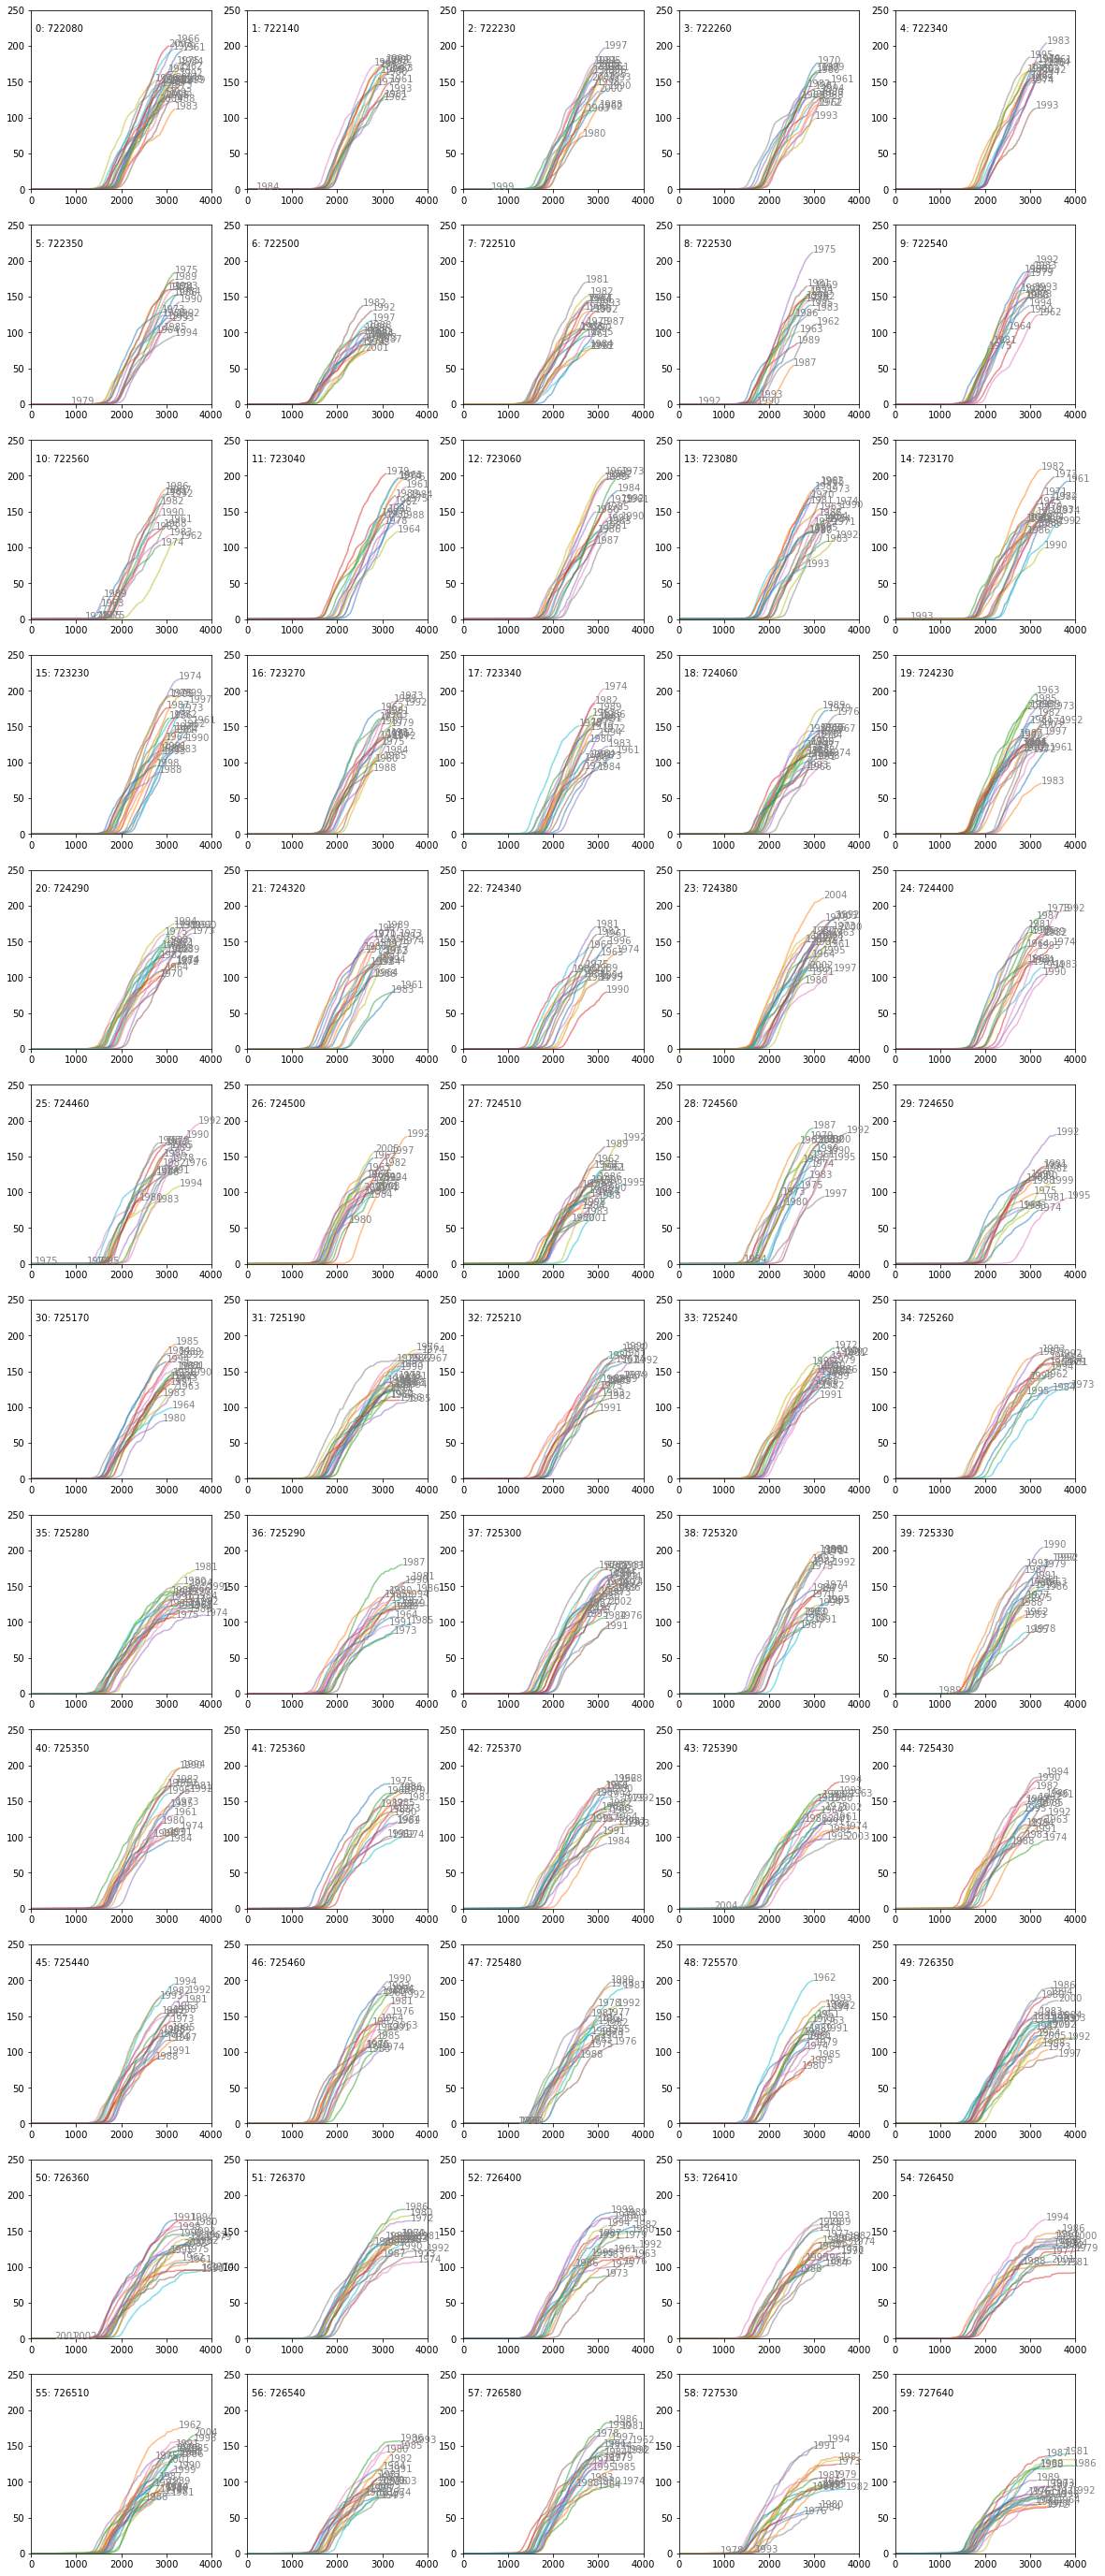

In [186]:
fig = plt.figure(figsize=(20,50))

for loc in np.arange(60):
    ax = fig.add_subplot(12,5,loc+1)
    ax.set_ylim(0,250)
    ax.set_xlim(0,4000)
    site = df_sites.iloc[loc].site
    years = list(set(df_sims.query(f'site == "{site}"').year))
    ax.annotate(f'{loc}: {df_sites.site[loc]}', (100,220))

    for year in years:
        df = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/control_dympd/{year}/var_0/out1_{site}_{year}_var_0.txt')
        df.columns = cols

        ax.plot(df.dm_ear, alpha=0.5)
        ax.annotate(year , (len(df), list(df.dm_ear)[-1]), color='grey')

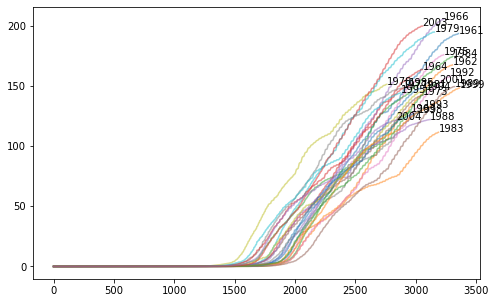

In [4]:
site = df_sites.iloc[0].site
years = list(set(df_sims.query(f'site == "{site}"').year))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

for year in years:
    df = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/control_dympd/{year}/var_0/out1_{site}_{year}_var_0.txt')
    df.columns = cols
    
    ax.plot(df.dm_ear, alpha=0.5)
    ax.annotate(year , (len(df), list(df.dm_ear)[-1]))

Text(0.5, 1.0, 'climate')

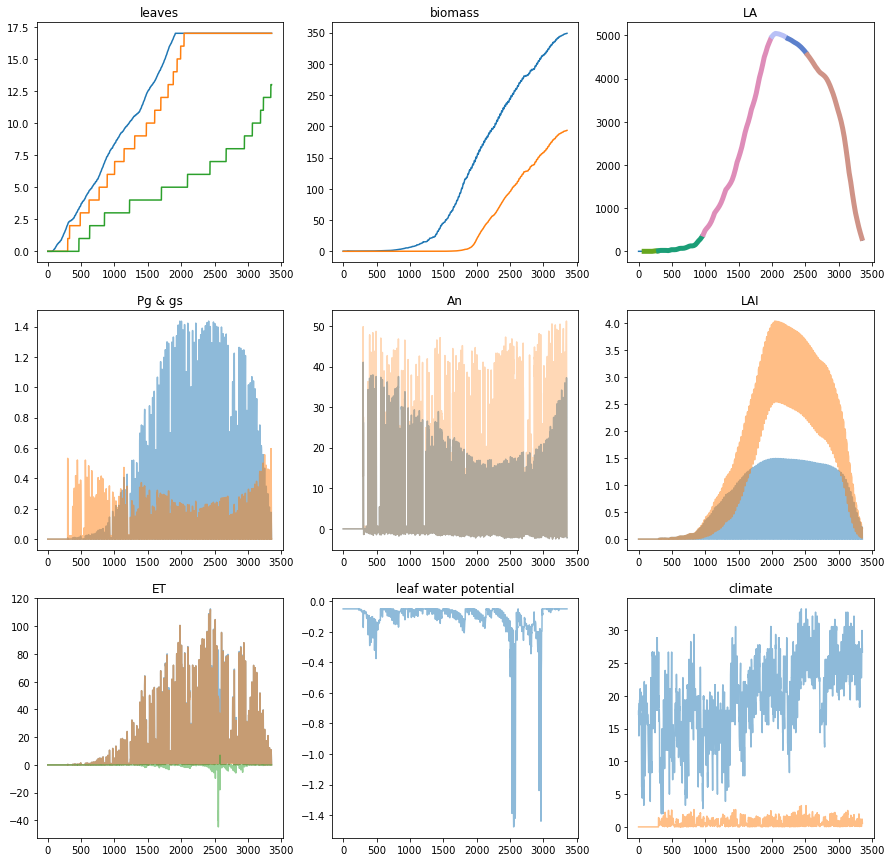

In [7]:
site = df_sites.iloc[0].site
year = 1961


df = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/control_dympd/{year}/var_0/out1_{site}_{year}_var_0.txt')
df.columns = cols
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,3,1)
ax1.plot(df.leaves)
ax1.plot(df.mature_lvs)
ax1.plot(df.drop_lvs)
ax1.set_title('leaves')

ax2 = fig.add_subplot(3,3,2)
ax2.plot(df.dm_total)
ax2.plot(df.dm_ear)
ax2.set_title('biomass')

ax3 = fig.add_subplot(3,3,3)
ax3.plot(df.LA)
ax3.set_title('LA')
ax3.plot(df[(df.time == 12) & (df.note == '        "Germinated"')] ['LA'], color='#66a61e', linewidth=5)
ax3.plot(df[(df.time == 12) & (df.note == '           "Emerged"')] ['LA'], color='#1b9e77', linewidth=5)
ax3.plot(df[(df.time == 12) & (df.note == '        "Tasselinit"')] ['LA'], color=Mendl_4.mpl_colors[0], linewidth=5)
ax3.plot(df[(df.time == 12) & (df.note == '          "Tasseled"')] ['LA'], color=Mendl_4.mpl_colors[1], linewidth=5)
ax3.plot(df[(df.time == 12) & (df.note == '            "Silked"')] ['LA'], color=Mendl_4.mpl_colors[3], linewidth=5)
ax3.plot(df[(df.time == 12) & (df.note == '         "grainFill"')] ['LA'], color=Mendl_4.mpl_colors[2], linewidth=5)

ax4 = fig.add_subplot(3,3,4)
ax4.plot(df.Pg, alpha=0.5)
ax4.plot(df.av_gs, alpha=0.5)
ax4.set_title('Pg & gs')

ax5 = fig.add_subplot(3,3,5)
ax5.plot(df.An_shaded, alpha=0.5)
ax5.plot(df.An_sunlit, alpha=0.3)
ax5.set_title('An')

ax6 = fig.add_subplot(3,3,6)
ax6.plot(df.LAI_sunlit, alpha=0.5)
ax6.plot(df.LAI_shaded, alpha=0.5)
ax6.set_title('LAI')

ax7 = fig.add_subplot(3,3,7)
ax7.plot(df.ET_dmd, alpha=0.5)
ax7.plot(df.ET_suply, alpha=0.5)
ax7.plot(df.ET_suply - df.ET_dmd, alpha=0.5)
ax7.set_title('ET')

ax8 = fig.add_subplot(3,3,8)
ax8.plot(df.leaf_WP, alpha=0.5)
ax8.set_title('leaf water potential')

ax9 = fig.add_subplot(3,3,9)
ax9.plot(df.temp_air, alpha=0.5)
ax9.plot(df.VPD, alpha=0.5)
ax9.set_title('climate')

### Temperature & photoperiod-induced leaf initiation
- cooler or warmer temps induce more leaves
- longer days induce more leaves (short days induce transition into reproductive stage)

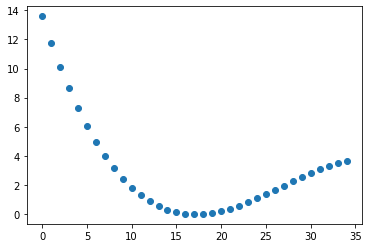

In [3]:
addleaftemps = []
for T_ind in np.arange(0,35):
    addLeafTemperature = max(0.0, (13.6 - 1.89*T_ind + 0.081*T_ind*T_ind - 0.001*T_ind*T_ind*T_ind))
    addleaftemps.append(addLeafTemperature)

plt.scatter(np.arange(35), addleaftemps)

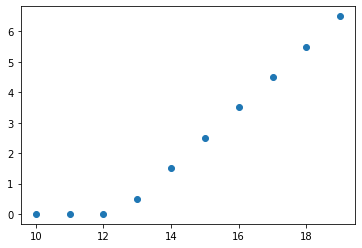

In [11]:
juvLeafNo = 20
addleafphotos = []
for dayLength in np.arange(10,20):
    addLeafPhotoPeriod = max(0.0, 0.1*(juvLeafNo - 10.0)*(dayLength - 12.5))
    addleafphotos.append(addLeafPhotoPeriod)

plt.scatter(np.arange(10,20), addleafphotos)

## Corn yield contest data by states (2020)

In [208]:
# Filters for year, planting area, & irrigation level
area = 10000/2.47  # acre into ha

# Upscale yield from plant level (g/plant) to field level (tons/ha)
pop = 8 # plants/m2
ha_to_m2 = 10000
ton_to_g = 1000000  # metric ton
yield_conv = 0.86  # only portion of ear converts into yield

In [226]:
bushels_per_acre = 350
lbs_per_bushel = 56
ton_per_lbs = 0.0005
acre_per_ha = 2.47105

bushels_per_acre * lbs_per_bushel * lbs_to_tons * acre_per_ha

24.21629

In [242]:
df_contest = pd.read_csv('/home/disk/eos8/ach315/data/yield_contest.csv')
df_site_contest = pd.merge(df_sites, df_contest, on='state')

In [259]:
df_site_contest['yield'].max()

385.44

In [264]:
df_site_contest.nlargest(5, 'yield')

,site,class,station,state,tzone,lat,lon,years,area,perct_irri,texture,yield,cbelt
24,724320,1,EVANSVILLE REGIONAL AP,IN,-6,38.050,-87.533,25,31678.84100,1.768046,SiLo,385.440,1
25,724380,1,INDIANAPOLIS INTL AP,IN,-5,39.717,-86.267,26,28133.78900,0.747167,SiLo,385.440,1
26,725330,1,FORT WAYNE INTL AP,IN,-5,41.000,-85.200,24,30707.59380,0.333363,SiCl,385.440,1
27,725350,1,SOUTH BEND MICHIANA RGNL AP,IN,-5,41.700,-86.333,19,36065.64020,14.506233,SaLo,385.440,1
0,722080,1,CHARLESTON INTL ARPT,SC,-5,32.900,-80.033,25,10052.40688,5.735219,SaLo,370.832,0


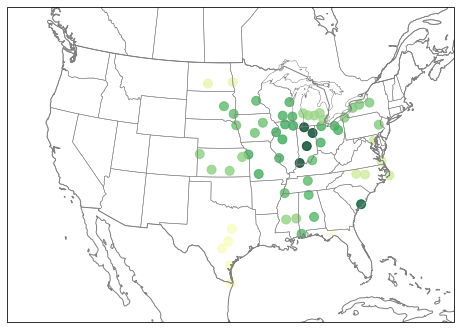

In [283]:
# Visualize
fig = plt.figure(figsize=(8,6))
extent = [-123, -72, 19, 53]

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
ax.scatter(df_site_contest.lon, df_site_contest.lat, 
           c=df_site_contest['yield'],
           cmap=YlGn_9.mpl_colormap,
           transform=ccrs.PlateCarree(), alpha=0.8, s=80)

ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)


## Identify performance frontiers

In [ ]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_present.yml')

In [55]:
df = df_matured
groups = ['cvar', 'site']
mx_mean = agg_sims(df, groups, 'mean')
df_yield_means = pd.DataFrame(mx_mean)

# Sort data based on mean yield value
df_yield_means['mean'] = df_yield_means.mean(axis=1)

In [61]:
phenos_ranked_by_yield = list(df_yield_means.sort_values(by=['mean'], axis=0, ascending=False).index)

In [50]:
run_name = 'present'
n_pheno=100
w_yield=1
w_disp=1

df_rankings, phenos_ranked = rank_all_phenos(run_name, n_pheno, w_yield, w_disp)

In [110]:
list(set(top_phenos))

[65, 4, 58, 9, 46, 81, 18, 57, 90, 62]

In [114]:
df_top_phenos = pd.DataFrame(top_phenos, columns=['pheno'])

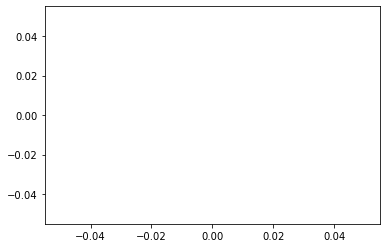

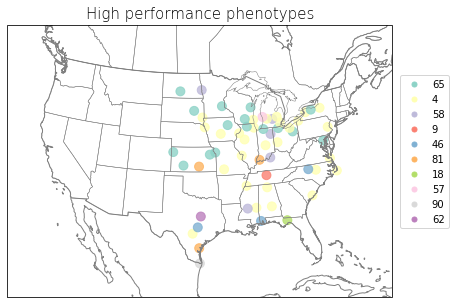

In [115]:
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3',
          '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd']
texts = list(set(top_phenos))
patches = [plt.plot([],[], marker='o', ms=5, ls='', 
                    color=colors[i], 
                    label=texts[i])[0] for i in range(len(texts)) ]


# Visualization
fig = plt.figure(figsize=(7,5))
colors = {65:'#8dd3c7', 4:'#ffffb3', 58:'#bebada', 9:'#fb8072', 46:'#80b1d3',
          81:'#fdb462', 18:'#b3de69', 57:'#fccde5', 90:'#d9d9d9', 62:'#bc80bd'}

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123, -72, 19, 53])
mp = ax.scatter(df_sites.lon, df_sites.lat, transform=ccrs.PlateCarree(),
                c=df_top_phenos.pheno.map(colors), cmap=Pastel_10.mpl_colormap, alpha=0.8, s=80)
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('High performance phenotypes', fontweight='light', size=15)

fig.legend(handles=patches, loc='right', borderaxespad=0.2)


Text(0.5, 1.0, 'High performance phenotypes')

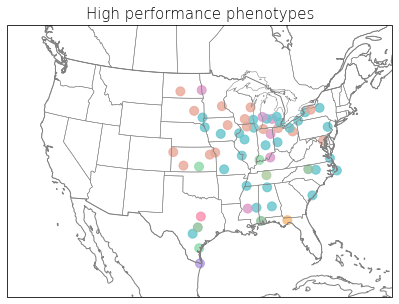

In [116]:
# Visualization
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123, -72, 19, 53])
mp = ax.scatter(df_sites.lon, df_sites.lat, transform=ccrs.PlateCarree(),
                c=top_phenos, cmap=Pastel_10.mpl_colormap, alpha=0.8, s=80)
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('High performance phenotypes', fontweight='light', size=15)



### Running PCAs on heatmap outputs

In [8]:
import matplotlib.pyplot as plt
from palettable.colorbrewer.sequential import YlGn_9

from sklearn.decomposition import PCA
from ideotype.analysis import run_pca, rank_all_phenos

In [4]:
run_name = 'present'
n_pheno=100
w_yield=1
w_disp=1

# Rank all phenotypes
df_rankings, phenos_ranked = rank_all_phenos(run_name, n_pheno, w_yield, w_disp)

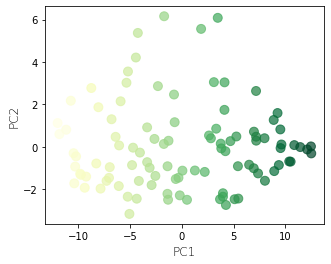

In [9]:
pca, df_pca = run_pca(df_rankings, 3)
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 12, fontweight='light')
ax.set_ylabel('PC2', fontsize = 12, fontweight='light')
ax.scatter(df_pca.loc[:,'PC1'], df_pca.loc[:, 'PC2'], 
           c = df_rankings.sum(axis=1),
           s=80, alpha=0.7, cmap=YlGn_9.mpl_colormap)


In [3]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_present.yml')

# Set up sites and phenotypes
sites_unsorted = list(set(df_sims.site))
sites = sites_unsorted.copy()
sites.sort()
phenos = list(set(df_sims.cvar))

In [4]:
# Function parameters
n_pheno = 100
w_yield = 1
w_disp = 1
run_name = 'present'

# Rank phenotypes
df_rankings, phenos_ranked = rank_all_phenos(run_name, n_pheno, w_yield, w_disp)

# Reverse ranking system
# such that high performance has high rank
phenos_ranked_reversed = phenos_ranked.copy()
phenos_ranked_reversed.reverse()

df_phenorank = pd.DataFrame({'rank': np.arange(100), 
                             'pheno': phenos_ranked_reversed})
phenos_rank_sorted = list(df_phenorank.sort_values('pheno')['rank'])

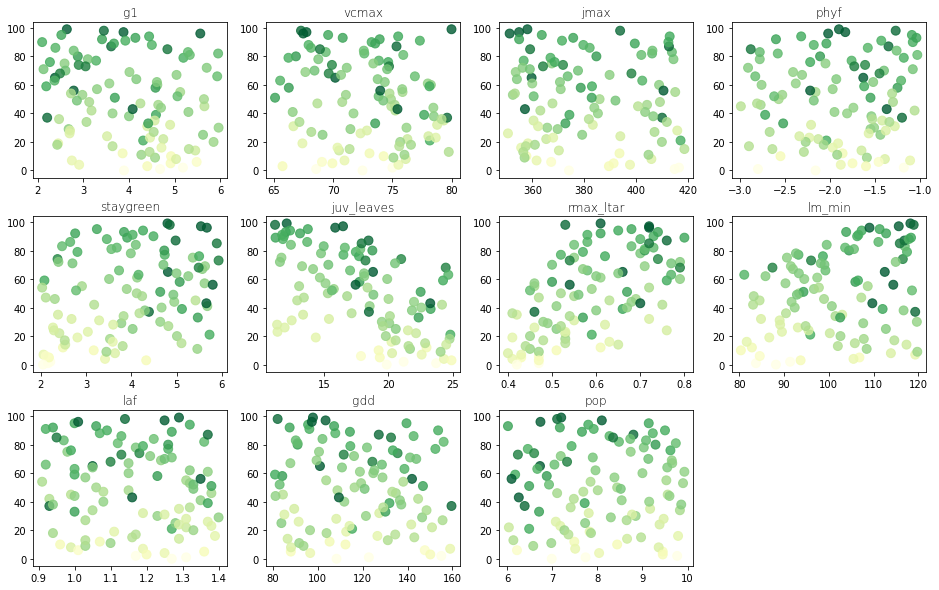

In [22]:
params = ['g1', 'vcmax', 'jmax', 'phyf',
          'staygreen', 'juv_leaves', 'rmax_ltar', 'lm_min',
          'laf', 'gdd', 'pop']

fig = plt.figure(figsize=(16,10))
for index, param in zip(np.arange(len(params)), params):
    ax = fig.add_subplot(3,4,index+1)
    yield_mean = df_all.groupby('cvar').mean().dm_ear
    plt.scatter(df_params.iloc[:100][param], phenos_rank_sorted, 
                c=yield_mean, s=80, alpha=0.8, 
                cmap=YlGn_8.mpl_colormap, vmin=50, vmax=200)
    ax.set_title(param, fontweight='light')

fig.subplots_adjust(wspace=0.2, hspace=0.25)

In [16]:
run_name = 'present'
n_pheno=100
w_yield=1
w_disp=1

# Identify ranking for all phenotypes
df_pheno, mx = identify_top_phenos(
    run_name, n_pheno=n_pheno, w_yield=w_yield, w_disp=w_disp)

# Rank general performance for all phenotypes across all sites
performance = []
for site in np.arange(df_pheno.shape[0]):
    # Select phenotypes ranked by performance from df_pheno
    phenos = df_pheno.iloc[site, :n_pheno].tolist()

    # Assign each phenotype ranked value
    # -- lower values mean better performance)
    pheno_ranks = np.arange(n_pheno)

    # Compile phenotype and ranking info into dict
    dict_rank = dict(zip(phenos, pheno_ranks))

    # Sort dict to order by phenotype
    dict_sorted = collections.OrderedDict(sorted(dict_rank.items()))

    # Append ranking into list of performance
    performance.append(list(dict_sorted.values()))

df_performance = pd.DataFrame(performance).transpose()

In [17]:
ranks = []
fig = plt.figure(figsize=(20,20))
for item in np.arange(60):
    rank = list(99 - df_performance.iloc[:,item])
    ranks.extend(rank)

<Figure size 1440x1440 with 0 Axes>

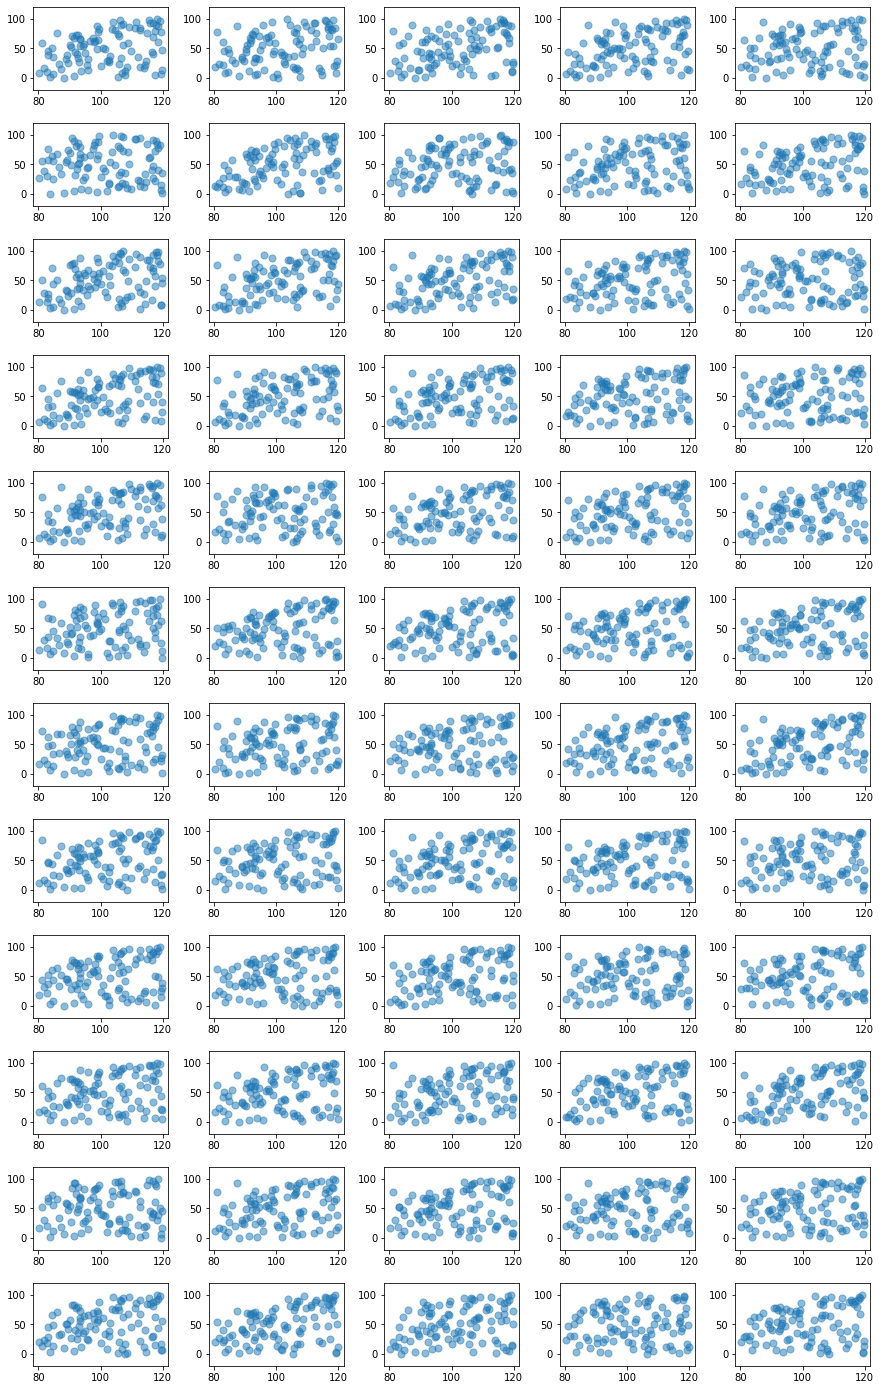

In [18]:
fig = plt.figure(figsize=(15,25))

for item in np.arange(60):
    ax = fig.add_subplot(12,5,item+1)
    ax.scatter(df_params.iloc[:100]['lm_min'],
                99-df_performance.iloc[:,item], s=50, alpha=0.5, 
                cmap=YlGn_8.mpl_colormap, vmin=50, vmax=200)
    ax.set_ylim(-20,120)

fig.subplots_adjust(wspace=0.3, hspace=0.4)

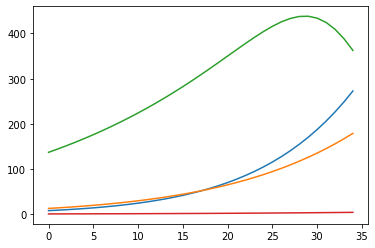

In [34]:
Vpm25 = 70
Vcm25 = 65
Jm25 = 350
Rd25 = 2
Kp25 = 80
Q10 = 2
Ear = 39800
Eaj = 32800
EaVp = 75100
EaVc = 55900
R = 8.314
Sj = 703
Hj = 220000

Jmaxs = []
Vpmaxs = []
Vcmaxs = []
Rds = []
Kps = []

for Tleaf in np.arange(5,40):
    Vpmax = Vpm25*np.exp(EaVp*(Tleaf-25)/(298*R*(Tleaf+273)))
    Vcmax = Vcm25*np.exp(EaVc*(Tleaf-25)/(298*R*(Tleaf+273)))
    Jmax = Jm25*np.exp((((Tleaf+273)-298)*Eaj)/(R*(Tleaf+273)*298))*(
        1+np.exp((Sj*298-Hj)/(R*298)))/(1+np.exp((Sj*(Tleaf+273)-Hj)/(R*(Tleaf+273.0))))
    Rd = Rd25*np.exp(Ear*(Tleaf-25)/(298*R*(Tleaf+273)))
    Kp = Kp25*pow(Q10,(Tleaf-25.0)/10.0)

    Vpmaxs.append(Vpmax)
    Vcmaxs.append(Vcmax)
    Jmaxs.append(Jmax)
    Rds.append(Rd)
    Kps.append(Kp)

plt.plot(Vpmaxs)
plt.plot(Vcmaxs)
plt.plot(Jmaxs)
plt.plot(Rds)